In [97]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,8)

In [59]:
loan_df = pd.read_csv('loan_prediction.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
loan_df.shape

(614, 13)

In [61]:
print('Numerical columns :',loan_df.select_dtypes(exclude='object').columns.tolist())
print('Catagorical columns :',loan_df.select_dtypes(include='object').columns.tolist())


Numerical columns : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Catagorical columns : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [69]:
loan_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [68]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(), inplace=True)


/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_17534/2721629885.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_17534/2721629885.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

Text(0.5, 1.0, 'Loan Status Destribution')

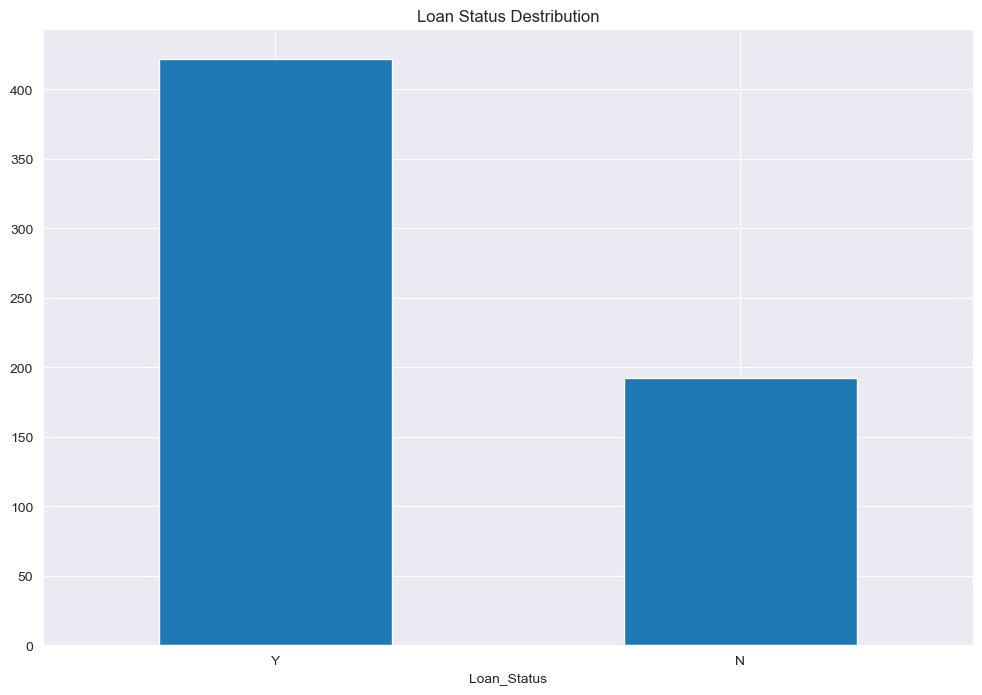

In [140]:
plt.figure(figsize=(12,8))
loan_df['Loan_Status'].value_counts().plot(kind ='bar')
plt.xticks(rotation=360)
plt.title('Loan Status Destribution')

Shows High Class Imbalance. So might need to resample later.

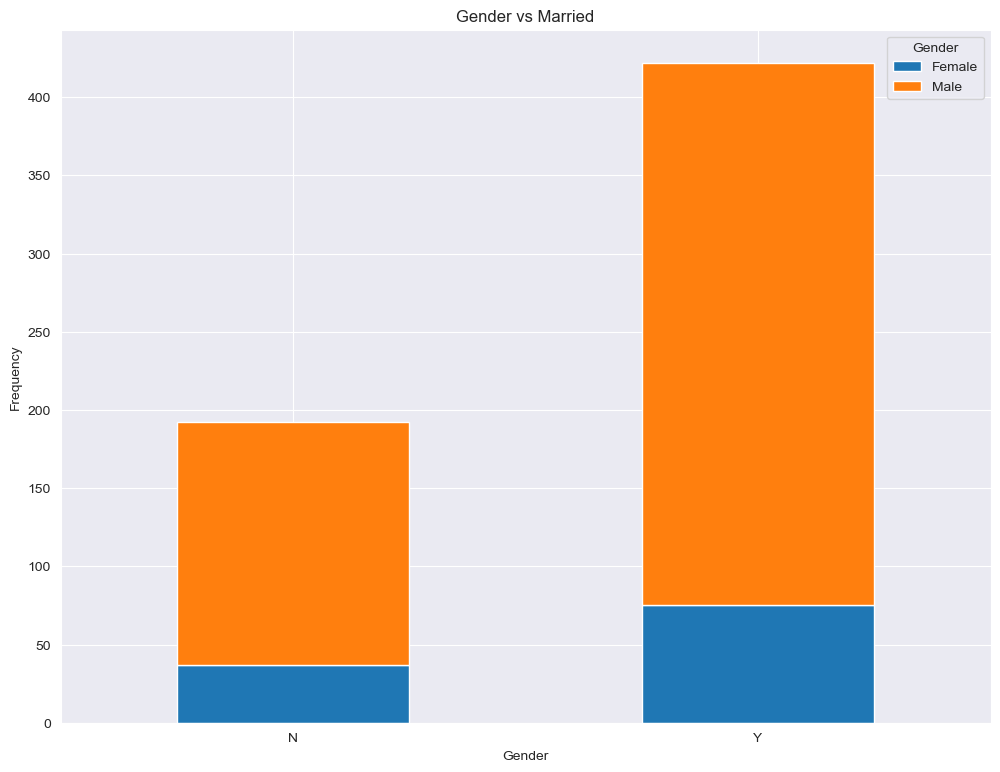

In [88]:
pd.crosstab(loan_df.Loan_Status,loan_df.Gender).plot(kind = "bar",stacked = True)

plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


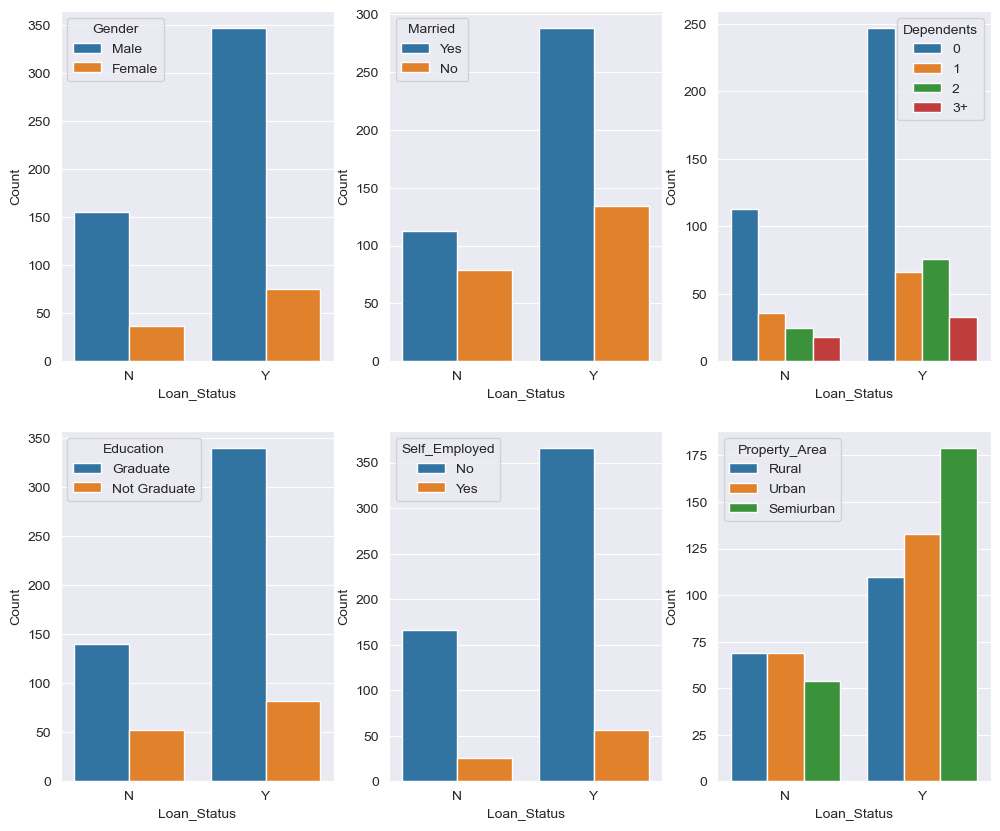

In [137]:
catagorical_cols = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

plt.figure(figsize=(12,10))
for i,col in enumerate(catagorical_cols):
 plt.subplot(2, 3, i+1)
 col_plot = loan_df.groupby('Loan_Status')[col].value_counts().reset_index(name = 'Count')
 sns.barplot(x='Loan_Status',y='Count',hue=col,data=col_plot)
 
plt.show()
 

<Figure size 1200x800 with 0 Axes>

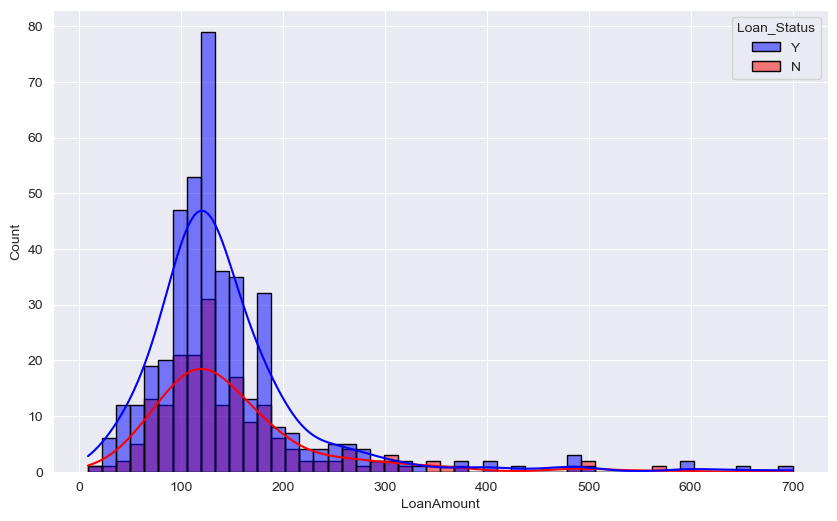

In [158]:
plt.figure(figsize=(12,8))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.histplot(x=loan_df['LoanAmount'], bins=50,
             hue=loan_df['Loan_Status'], palette=['blue', 'red'],
             edgecolor='black',kde=True)


plt.show()

Text(0.5, 1.0, 'Box plot for LoanAmount')

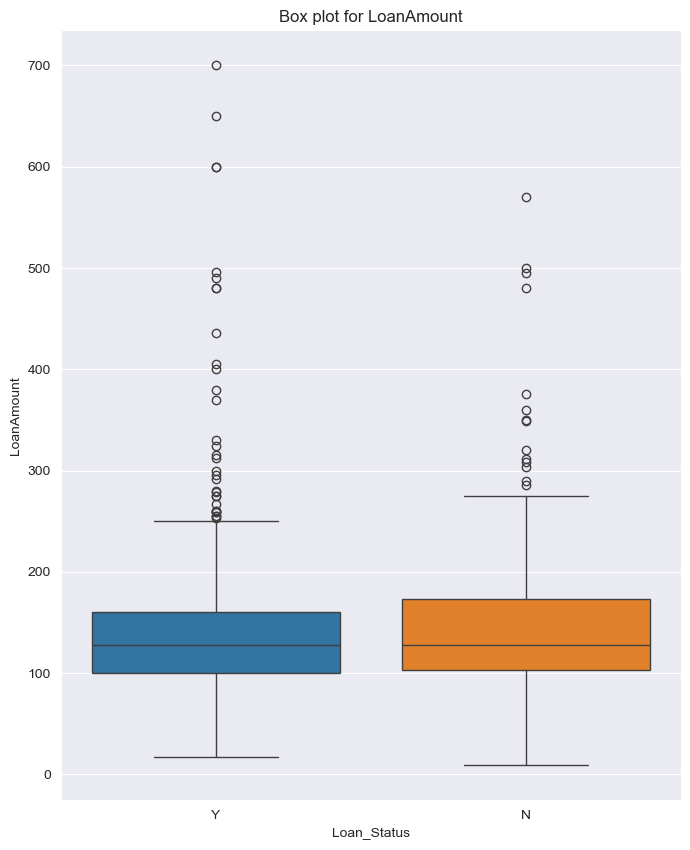

In [164]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Loan_Status',y='LoanAmount',data=loan_df,hue='Loan_Status')
plt.title('Box plot for LoanAmount')